In [21]:
import pandas as pd
import cv2
import os
from tqdm import tqdm
import numpy as np
from PIL import Image

from segmentation_ade import get_color_seg, get_pred_seg, preprocess_image, id2label, ade_palette

# Preprocess images

In [22]:
source_dir = 'data/in/Most_extreme_pictures'
out_dir = 'data/out'

In [23]:
def do_in_file_path(source_dir, action):
    # Recursively get all file paths
    file_paths = []
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if not file.startswith("Icon"):
                file_paths.append(os.path.join(root, file))

    # To quickly test just for one file, uncomment the next line
    # file_paths = [file_paths[0]]
    for file_path in tqdm(file_paths):
        tqdm.write(f'Processing: {file_path}')
        action(file_path)

In [24]:
def preprocess_and_save(file_path):
    # Exclude non-image file types
    valid_extensions = ('.jpg', '.jpeg', '.png', '.tiff', '.bmp', '.gif')
    if file_path.lower().endswith(valid_extensions):
        relative_path = os.path.relpath(file_path, source_dir)

        # Ensure the destination file has a single .jpg extension
        relative_path = relative_path.split('.')[0] + '.jpg'
        destination_path = os.path.join(out_dir, 'images_preprocessed', relative_path)
        
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        
        image = cv2.imread(file_path)
        preprocessed_image = preprocess_image(image)
        cv2.imwrite(destination_path, preprocessed_image)

# Preprocess images and maintain subfolder structure
do_in_file_path(source_dir, preprocess_and_save)


100%|██████████| 3/3 [00:00<00:00, 18.88it/s]

Processing: data/in/Most_extreme_pictures/.DS_Store
Processing: data/in/Most_extreme_pictures/HTHB02.jpg
Processing: data/in/Most_extreme_pictures/HTHB04.jpg


# Get and save segmentations


  0%|          | 0/2 [00:00<?, ?it/s]

Processing: data/out/images_preprocessed/HTHB02.jpg


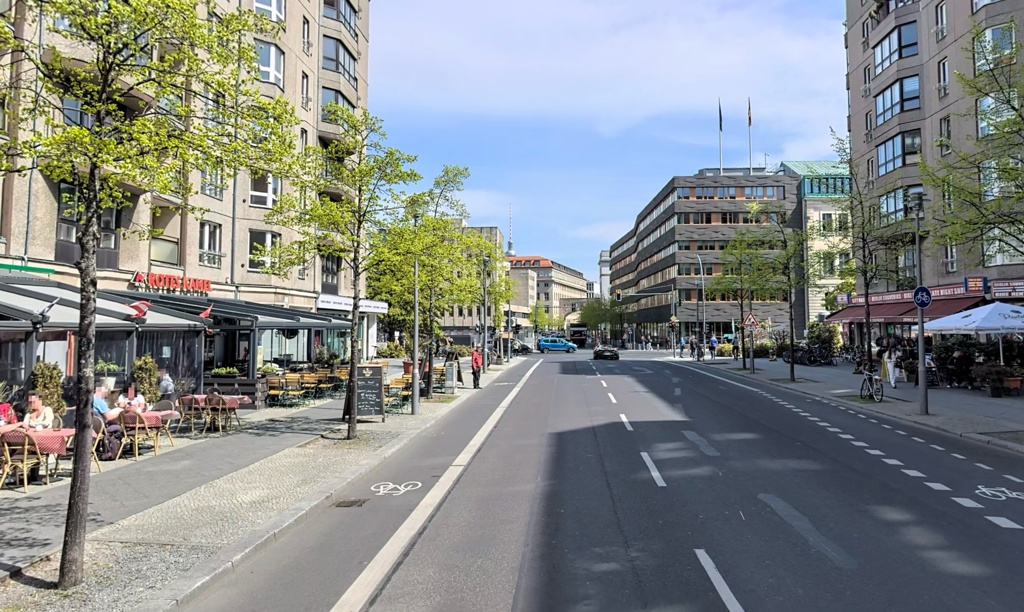

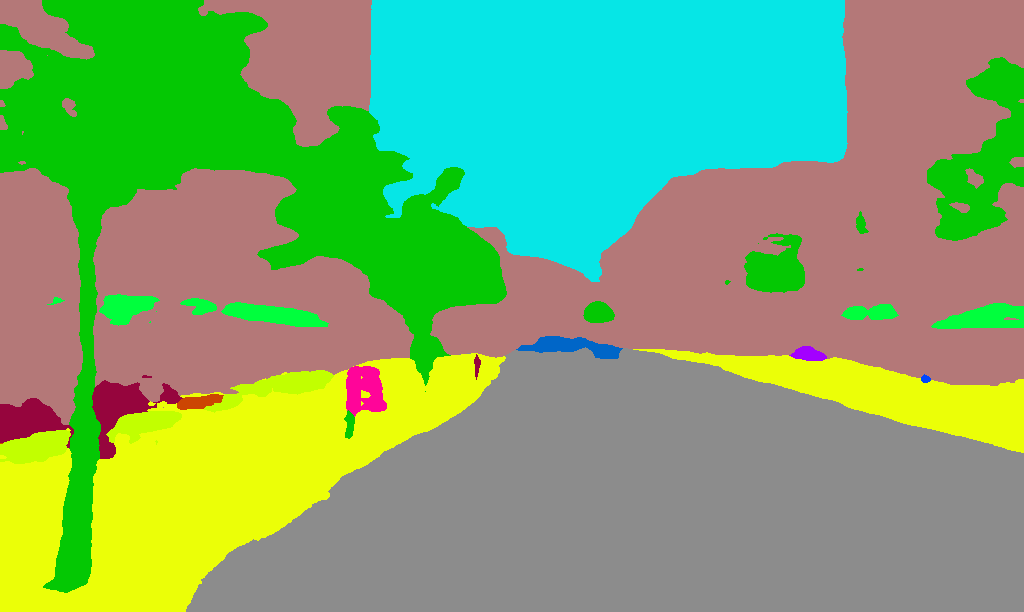

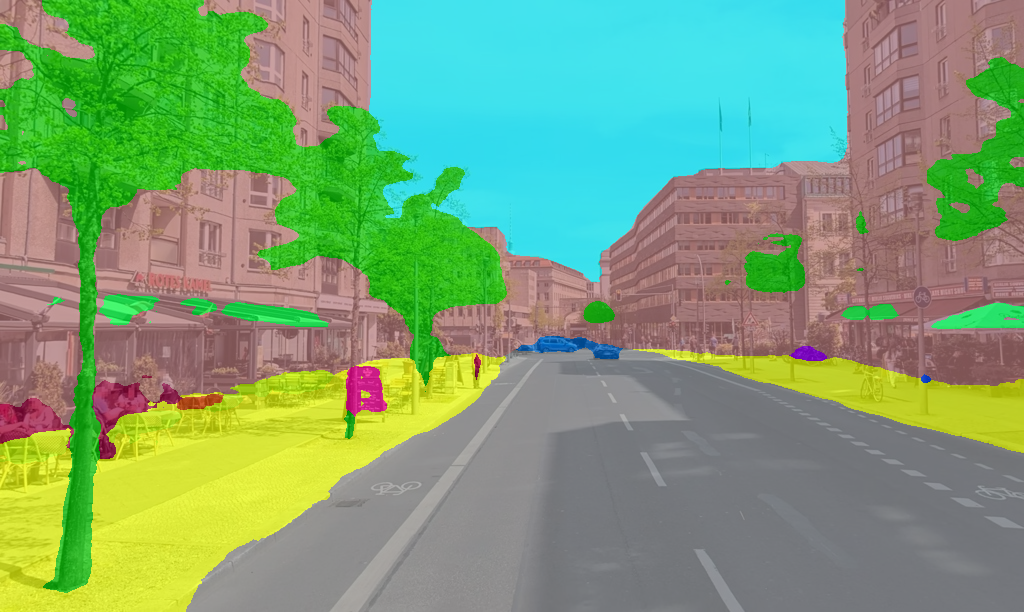

 50%|█████     | 1/2 [00:07<00:07,  7.07s/it]

Processing: data/out/images_preprocessed/HTHB04.jpg


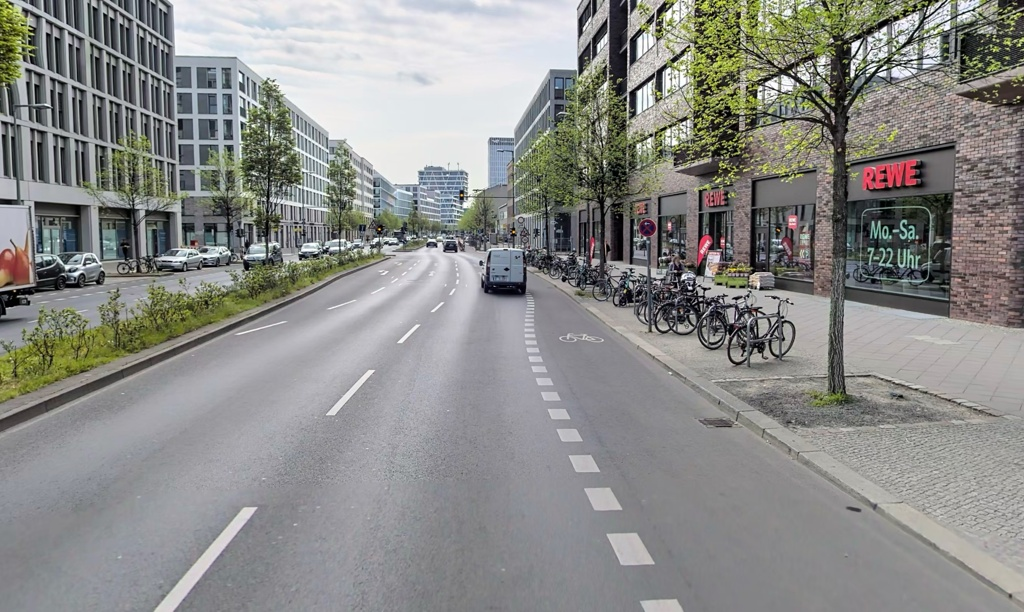

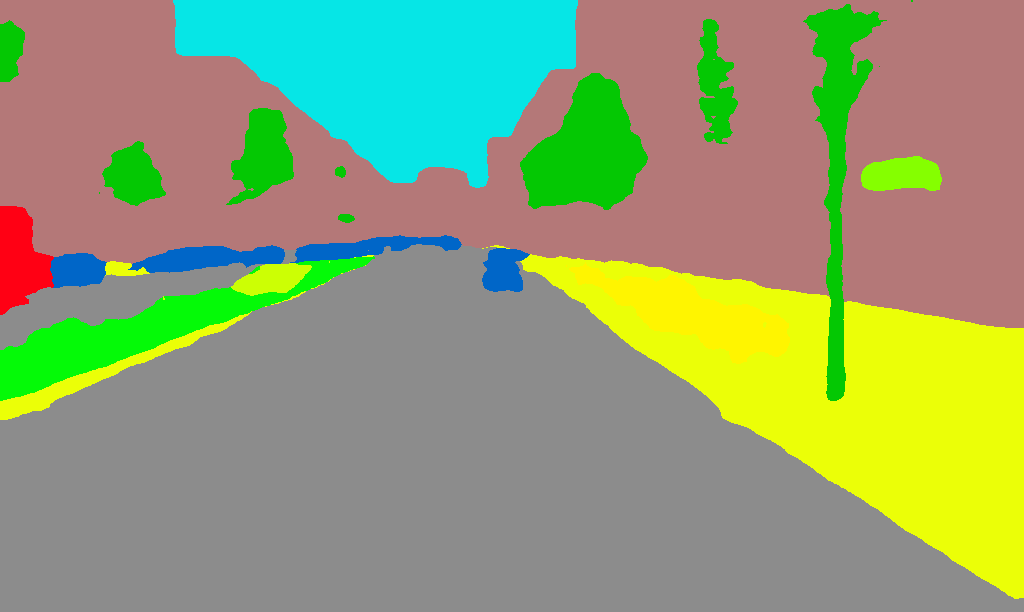

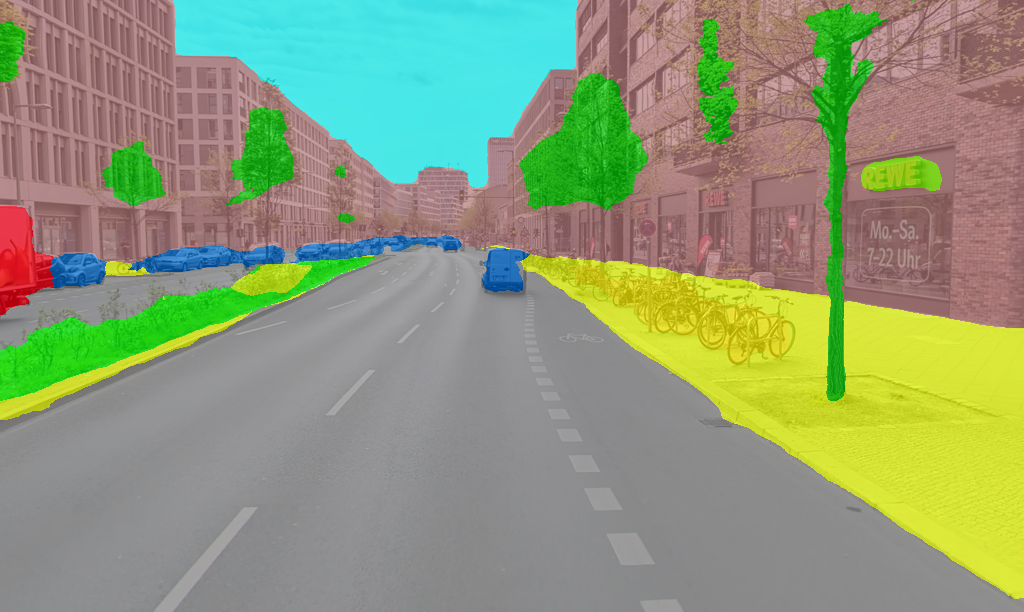

100%|██████████| 2/2 [00:14<00:00,  7.24s/it]


In [25]:
source_dir = f'{out_dir}/images_preprocessed/'

images_as_arrays = []
segmentation_destination_dir = f'{out_dir}/segmentations/'
os.makedirs(segmentation_destination_dir, exist_ok=True)


def get_and_save_segmentation(file_path):
        relative_path = os.path.relpath(file_path, source_dir)

        # Ensure the destination file has a single .jpg extension
        relative_path = relative_path.split('.')[0] + '.jpg'
        destination_path = os.path.join(segmentation_destination_dir, relative_path)
        
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        
        # Display the original image
        pil_image = Image.open(file_path)
        display(pil_image)

        image = np.array(pil_image)

        images_as_arrays.append({
                'img_name': os.path.basename(file_path),
                'predicted_segmentation': get_pred_seg(np.array(image)).numpy()
        })  

        # Get the color segmentation
        color_seg = get_color_seg(image)

        pil_segmentation_image = Image.fromarray(color_seg)
        pil_segmentation_image.save(destination_path)

        # Display the predicted segmentation
        display(pil_segmentation_image)

        # Display the colored segmentation overlaye over the original image
        blended = cv2.addWeighted(image, 0.3, color_seg, 0.7, 0.0)
        pil_blended_image = Image.fromarray(blended)
        display(pil_blended_image)
        

do_in_file_path(source_dir, get_and_save_segmentation)


df_images_as_arrays = pd.DataFrame(images_as_arrays)
df_images_as_arrays.to_pickle(f'{out_dir}/segmentation_results.pickle')

# Plot examples

In [26]:
# Fix Matplotlib font issues

# Clear matplotlib font cache and rebuild
import matplotlib
import matplotlib.font_manager as fm

# Clear the font cache
try:
    # For newer versions of matplotlib
    fm.fontManager.__init__()
except AttributeError:
    try:
        # For older versions
        fm._rebuild()
    except AttributeError:
        # Alternative method
        import matplotlib.pyplot as plt
        plt.rcParams['font.family'] = 'sans-serif'
        print("Using alternative font cache refresh method")

# List available fonts to see if Fira Sans is detected
fonts = [f.name for f in fm.fontManager.ttflist]
fira_fonts = [f for f in fonts if 'fira' in f.lower() or 'Fira' in f]
print("Available Fira fonts:", fira_fonts)

# Try to find Fira Sans specifically
try:
    fira_sans = fm.findfont(fm.FontProperties(family='Fira Sans'))
    print(f"Fira Sans found at: {fira_sans}")
except:
    print("Fira Sans not found by matplotlib")


Available Fira fonts: ['FiraCode Nerd Font', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font Mono', 'Fira Sans', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font', 'FiraCode Nerd Font', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font']
Fira Sans found at: /Users/schnuckiputz/Library/Fonts/FiraSans-Regular.ttf


In [27]:
images_as_arrays = []

def get__segmentation_and_overlay(file_path):
                
        # Display the original image
        pil_image = Image.open(file_path)

        image = np.array(pil_image)

        # Get the color segmentation
        color_seg = get_color_seg(image)

        # Display the colored segmentation overlay over the original image
        blended = cv2.addWeighted(image, 0.3, color_seg, 0.7, 0.0)
        pil_blended_image = Image.fromarray(blended)

        images_as_arrays.append({
                'img_name': os.path.basename(file_path),
                'predicted_segmentation': get_pred_seg(np.array(image)).numpy(),
                'blended_image': pil_blended_image
        })  
        

example_image_paths = [
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/HTHB21.jpg',
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/HTLB17.jpg',
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/LTHB14.jpg',
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/LTLB01.jpg',
]

for file_path in example_image_paths:
    get__segmentation_and_overlay(file_path)

In [28]:
# Save all the unique values in the predicted_segmentation field of the images_as_arrays list
unique_values = set()
for item in images_as_arrays:
    unique_values.update(np.unique(item['predicted_segmentation']))

print(sorted(unique_values))

# Map the unique classes to class names and colors
ade_palette_array = ade_palette()
unique_class_labels_and_colors = [(id2label[i], ade_palette_array[i]) for i in sorted(unique_values)]


[np.int64(0), np.int64(1), np.int64(2), np.int64(4), np.int64(6), np.int64(9), np.int64(11), np.int64(12), np.int64(13), np.int64(17), np.int64(20), np.int64(32), np.int64(43), np.int64(82), np.int64(83), np.int64(87), np.int64(93), np.int64(102), np.int64(116), np.int64(127), np.int64(138)]


In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

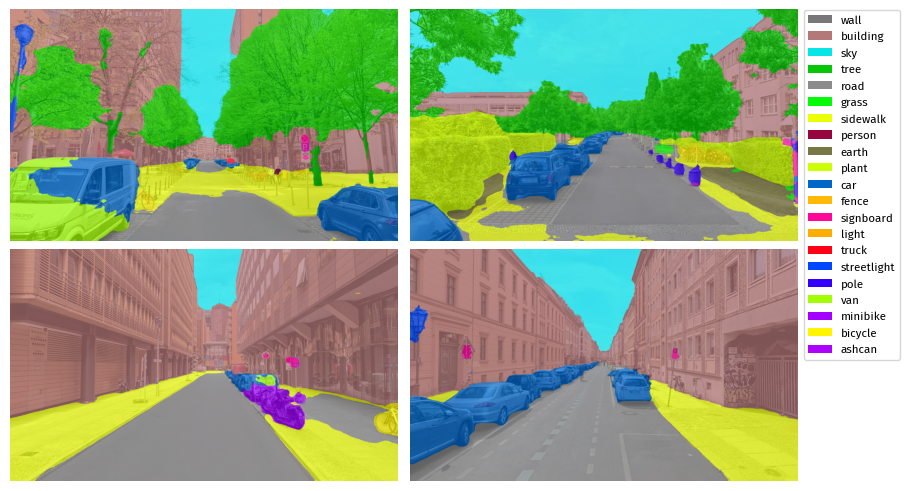

In [30]:
images_for_figure = [item['blended_image'] for item in images_as_arrays[:4]]

# Create a 2x2 figure displaying the blended images
# Determine image size and create a 2x2 figure proportional to image pixel dimensions
nrows, ncols = 2, 2
img_w, img_h = images_for_figure[0].size  # width, height in pixels

figsize = (8, 4.8)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

for ax, img in zip(axes.flatten(), images_for_figure):
    ax.imshow(img)
    ax.axis('off')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)     

# Legend with class names and colors
legend_elements = [Patch(facecolor=np.array(color)/255, label=label) for label, color in unique_class_labels_and_colors]
rcParams['font.family'] = 'Fira Sans'
font = FontProperties(family='Fira Sans', size='small')

fig.legend(handles=legend_elements, loc=2, ncol=1, prop=font, bbox_to_anchor=(1, 0.99), borderaxespad=0.0)

fig.set_constrained_layout(True)


plt.show()
